In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from itertools import combinations 
from PIL import Image

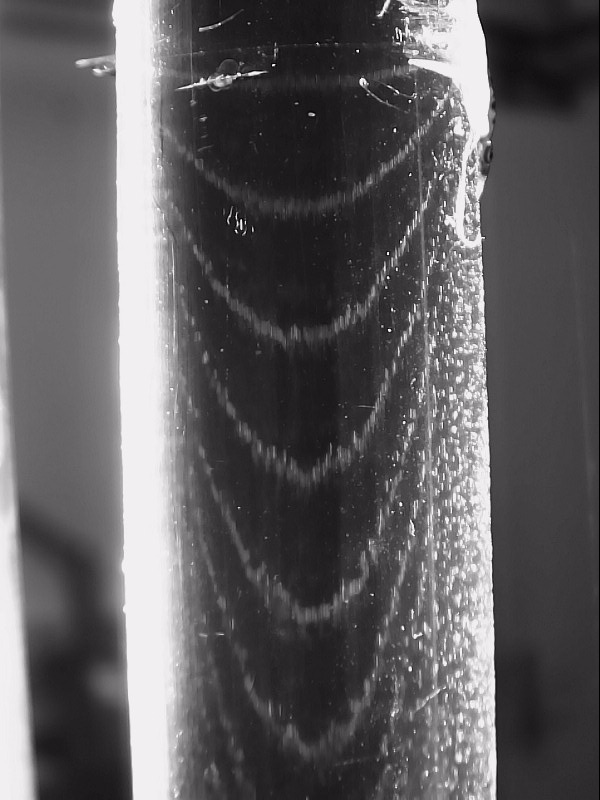

In [2]:
img = Image.open('Group_8/Image.bmp')
img

In [3]:
df = pd.read_excel('Group_8/image_points_position.xlsx', header=None, nrows=65)

In [4]:
df.head(10)

,0,1
0,Flow Rate= 18.00 %,NaN
1,Pulse Frequency= 5.00 Hz,NaN
2,NaN,NaN
3,Points coordinates,NaN
4,"X, mm","Y, mm"
5,3.97,5.99
6,3.97,11.19
7,3.97,15.86
8,3.97,22.12
9,3.97,28.38


In [5]:
consts = df.iloc[:2]
consts

,0,1
0,Flow Rate= 18.00 %,NaN
1,Pulse Frequency= 5.00 Hz,NaN


In [6]:
f = 5
Q = 6*0.18

In [7]:
data = df.iloc[4:].reset_index()
data.columns = data.iloc[0]
data.drop(data.index[0], inplace=True)

In [8]:
x = data['X, mm']
y = data['Y, mm']
r = (x - 15.95)
r_R = r/13
data = pd.DataFrame({'x':x, 'y':y, 'r':r, 'r/R':r_R})

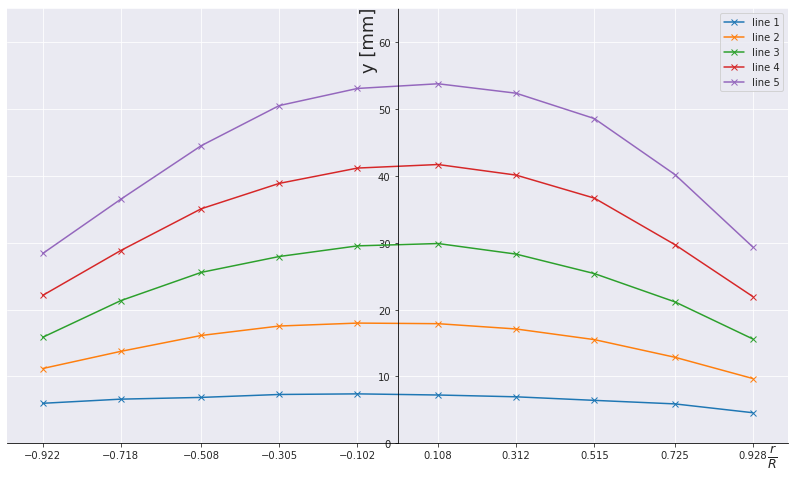

In [152]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(data.iloc[[x*6 for x in range(10)]]['r/R'], data.iloc[[x*6 for x in range(10)]]['y'], 'x-', label='line 1')
plt.plot(data.iloc[[x*6 + 1 for x in range(10)]]['r/R'], data.iloc[[x*6 + 1 for x in range(10)]]['y'], 'x-', label='line 2')
plt.plot(data.iloc[[x*6 + 2 for x in range(10)]]['r/R'], data.iloc[[x*6 + 2 for x in range(10)]]['y'], 'x-', label='line 3')
plt.plot(data.iloc[[x*6 + 3 for x in range(10)]]['r/R'], data.iloc[[x*6 + 3 for x in range(10)]]['y'], 'x-', label='line 4')
plt.plot(data.iloc[[x*6 + 4 for x in range(10)]]['r/R'], data.iloc[[x*6 + 4 for x in range(10)]]['y'], 'x-', label='line 5')
ax.spines['left'].set_position('center')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_label_coords(0.98, 0.)
ax.yaxis.set_label_coords(0.475, 0.93)
plt.xticks([i for i in data.iloc[[x*6 for x in range(10)]]['r/R']])
plt.ylim(0, 65)
plt.xlabel(r'$ \frac {r}{R} $', fontsize=18)
plt.ylabel('y [mm]', fontsize=18)
plt.legend(loc="best")
# plt.savefig('g1.png')
plt.show()

In [10]:
data.head()

,x,y,r,r/R
1,3.97,5.99,-11.98,-0.921538
2,3.97,11.19,-11.98,-0.921538
3,3.97,15.86,-11.98,-0.921538
4,3.97,22.12,-11.98,-0.921538
5,3.97,28.38,-11.98,-0.921538


In [11]:
comb = combinations([1, 2, 3, 4, 5], 2)
first, sec, third, forth, fifth = [], [], [], [], []
for i in list(comb):
    first.append((i[0], i[1]))
    sec.append((i[0]+6, i[1]+6)) 
    third.append((i[0]+12, i[1]+12))
    forth.append((i[0]+18, i[1]+18))
    fifth.append((i[0]+24, i[1]+24))

In [42]:
for i in range(10):
    if first[i] == (1, 2):
        dt = (first[i][1] - first[i][0])/f
        v12 = data.iloc[[x*6 + 1 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 for x in range(10)]]['y'].reset_index())['y']/dt
        v12 = v12.tolist()
    if first[i] == (1, 3):
        dt = (first[i][1] - first[i][0])/f
        v13 = data.iloc[[x*6 + 2 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 for x in range(10)]]['y'].reset_index())['y']/dt
        v13 = v13.tolist()
    if first[i] == (1, 4):
        dt = (first[i][1] - first[i][0])/f
        v14 = data.iloc[[x*6 + 3 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 for x in range(10)]]['y'].reset_index())['y']/dt
        v14 = v14.tolist()
    if first[i] == (1, 5):
        dt = (first[i][1] - first[i][0])/f
        v15 = data.iloc[[x*6 + 4 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 for x in range(10)]]['y'].reset_index())['y']/dt
        v15 = v15.tolist()
    if first[i] == (2, 3):    
        dt = (first[i][1] - first[i][0])/f
        v23 = data.iloc[[x*6 + 2 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 + 1 for x in range(10)]]['y'].reset_index())['y']/dt
        v23 = v23.tolist()
    if first[i] == (2, 4):
        dt = (first[i][1] - first[i][0])/f
        v24 = data.iloc[[x*6 + 3 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 + 1 for x in range(10)]]['y'].reset_index())['y']/dt
        v24 = v24.tolist()
    if first[i] == (2, 5):
        dt = (first[i][1] - first[i][0])/f
        v25 = data.iloc[[x*6 + 4 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 + 1 for x in range(10)]]['y'].reset_index())['y']/dt
        v25 = v25.tolist()    
    if first[i] == (3, 4):
        dt = (first[i][1] - first[i][0])/f
        v34 = data.iloc[[x*6 + 3 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 + 2 for x in range(10)]]['y'].reset_index())['y']/dt
        v34 = v34.tolist()
    if first[i] == (3, 5):
        dt = (first[i][1] - first[i][0])/f
        v35 = data.iloc[[x*6 + 4 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 + 2 for x in range(10)]]['y'].reset_index())['y']/dt
        v35 = v35.tolist()    
    if first[i] == (4, 5):
        dt = (first[i][1] - first[i][0])/f
        v45 = data.iloc[[x*6 + 4 for x in range(10)]]['y'].reset_index().subtract(data.iloc[[x*6 + 3 for x in range(10)]]['y'].reset_index())['y']/dt
        v45 = v45.tolist()

In [43]:
vel = pd.DataFrame({r'$\frac{r}{R}$': data.iloc[[x*6 for x in range(10)]]['r/R'], '$v_{12}$': v12, '$v_{13}$': v13, '$v_{14}$': v14, '$v_{15}$': v15, '$v_{23}$': v23, '$v_{24}$': v24, '$v_{25}$': v25, '$v_{34}$': v34, '$v_{35}$': v35, '$v_{45}$': v45})

In [44]:
vel.reset_index(inplace=True)
vel.drop(columns=['index'], inplace=True)

In [45]:
vel['$v_{avg}$'] = vel.iloc[:, 1:].apply(lambda row: np.mean(row), axis=1)
vel['$\sigma $'] = vel.iloc[:, 1:].apply(lambda row: np.std(row), axis=1)

In [46]:
vel

,$\frac{r}{R}$,$v_{12}$,$v_{13}$,$v_{14}$,$v_{15}$,$v_{23}$,$v_{24}$,$v_{25}$,$v_{34}$,$v_{35}$,$v_{45}$,$v_{avg}$,$\sigma $
0,-0.921538,26.00,24.675,26.883333,27.9875,23.35,27.325,28.650000,31.30,31.300,31.30,27.877083,2.546339
1,-0.718462,35.70,36.800,37.016667,37.3375,37.90,37.675,37.883333,37.45,37.875,38.30,37.393750,0.674053
2,-0.508462,46.30,46.725,47.000000,47.0375,47.15,47.350,47.283333,47.55,47.350,47.15,47.089583,0.324676
3,-0.305385,51.15,51.550,52.583333,53.9750,51.95,53.300,54.916667,54.65,56.400,58.15,53.862500,2.019930
4,-0.101538,52.90,55.300,56.250000,57.0625,57.70,57.925,58.450000,58.15,58.825,59.50,57.206250,1.763062
5,0.108462,53.30,56.600,57.416667,58.1500,59.90,59.475,59.766667,59.05,59.700,60.35,58.370833,1.941399
6,0.311538,50.70,53.325,55.233333,56.7250,55.95,57.500,58.733333,59.05,60.125,61.20,56.854167,2.894270
7,0.515385,45.40,47.375,50.383333,52.6500,49.35,52.875,55.066667,56.40,57.925,59.45,52.687500,4.160648
8,0.725385,34.85,38.125,39.666667,42.8500,41.40,42.075,45.516667,42.75,47.575,52.40,42.720833,4.468524
9,0.928462,25.55,27.550,28.933333,30.9500,29.55,30.625,32.750000,31.70,34.350,37.00,30.895833,2.996790


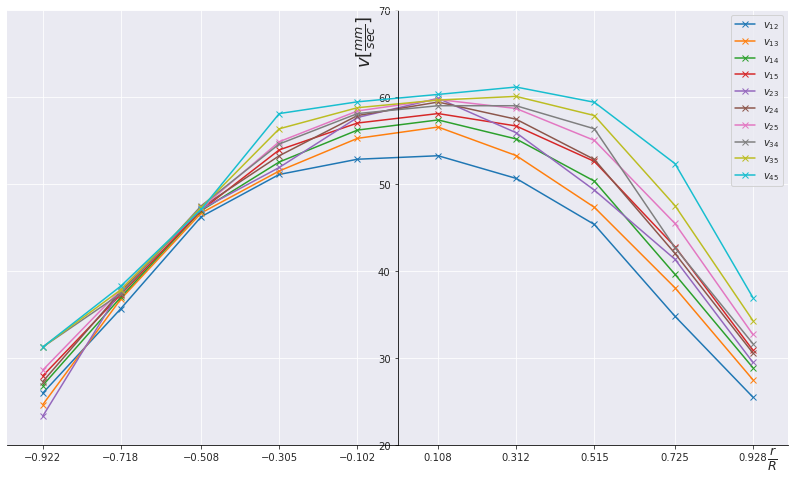

In [153]:
plt.close('all')
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{12}$'], 'x-', label='$v_{12}$')
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{13}$'], 'x-', label='$v_{13}$')
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{14}$'], 'x-', label='$v_{14}$')
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{15}$'], 'x-', label='$v_{15}$')
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{23}$'], 'x-', label='$v_{23}$')
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{24}$'], 'x-', label='$v_{24}$')
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{25}$'], 'x-', label='$v_{25}$')
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{34}$'], 'x-', label='$v_{34}$')
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{35}$'], 'x-', label='$v_{35}$')
plt.plot(vel[r'$\frac{r}{R}$'], vel['$v_{45}$'], 'x-', label='$v_{45}$')
ax.spines['left'].set_position('center')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_label_coords(0.98, 0.)
ax.yaxis.set_label_coords(0.475, 0.93)
plt.xticks([i for i in data.iloc[[x*6 for x in range(10)]]['r/R']])
plt.ylim(20, 70)
plt.xlabel(r'$ \frac {r}{R} $', fontsize=18)
plt.ylabel(r'$ v [\frac{mm}{sec}]$', fontsize=18)
plt.legend(loc="best")
plt.savefig('g2.png')
plt.show()

In [48]:
from IPython.display import Markdown as md

In [49]:
v_avg_th = ((Q/60)*10**6)/(np.pi*13**2)
v_max_th = 2*v_avg_th

In [50]:
md('$v_{avg, th}$''='f'{v_avg_th:.2f}'r'$\frac{mm}{sec}$' '<br>'
'$v_{max, th}$''='f'{v_max_th:.2f}'r'$\frac{mm}{sec}$')

$v_{avg, th}$=33.90$\frac{mm}{sec}$<br>$v_{max, th}$=67.81$\frac{mm}{sec}$

$ v_{z,th} = 67.81[1 - (\frac {r}{13})^2] \frac{mm}{sec} $

In [53]:
vel[r'$v_{z,th}$'] = vel[r'$\frac{r}{R}$'].apply(lambda x: v_max_th*(1 - (x**2)))

In [54]:
vel

,$\frac{r}{R}$,$v_{12}$,$v_{13}$,$v_{14}$,$v_{15}$,$v_{23}$,$v_{24}$,$v_{25}$,$v_{34}$,$v_{35}$,$v_{45}$,$v_{avg}$,$\sigma $,"$v_{z,th}$"
0,-0.921538,26.00,24.675,26.883333,27.9875,23.35,27.325,28.650000,31.30,31.300,31.30,27.877083,2.546339,10.222846
1,-0.718462,35.70,36.800,37.016667,37.3375,37.90,37.675,37.883333,37.45,37.875,38.30,37.393750,0.674053,32.805259
2,-0.508462,46.30,46.725,47.000000,47.0375,47.15,47.350,47.283333,47.55,47.350,47.15,47.089583,0.324676,50.275647
3,-0.305385,51.15,51.550,52.583333,53.9750,51.95,53.300,54.916667,54.65,56.400,58.15,53.862500,2.019930,61.482117
4,-0.101538,52.90,55.300,56.250000,57.0625,57.70,57.925,58.450000,58.15,58.825,59.50,57.206250,1.763062,67.106576
5,0.108462,53.30,56.600,57.416667,58.1500,59.90,59.475,59.766667,59.05,59.700,60.35,58.370833,1.941399,67.007997
6,0.311538,50.70,53.325,55.233333,56.7250,55.95,57.500,58.733333,59.05,60.125,61.20,56.854167,2.894270,61.224696
7,0.515385,45.40,47.375,50.383333,52.6500,49.35,52.875,55.066667,56.40,57.925,59.45,52.687500,4.160648,49.795030
8,0.725385,34.85,38.125,39.666667,42.8500,41.40,42.075,45.516667,42.75,47.575,52.40,42.720833,4.468524,32.127483
9,0.928462,25.55,27.550,28.933333,30.9500,29.55,30.625,32.750000,31.70,34.350,37.00,30.895833,2.996790,9.354412


In [165]:
from sklearn.metrics import r2_score

mymodel = np.poly1d(np.polyfit(vel[r'$\frac{r}{R}$'].tolist(), vel['$v_{avg}$'].tolist(), 2))
r2 = r2_score(vel['$v_{avg}$'].tolist(), mymodel(vel[r'$\frac{r}{R}$'].tolist()))
md('$R^2$' '=' f'{r2:.2f}' '<br>'
  f'v = {mymodel[2]:.2f}' r'($ \frac {r}{R})^2 $' '+' f'{mymodel[1]:.2f}' r'$\frac {r}{R}$' '+' f'{mymodel[0]:.2f} ')

$R^2$=0.99<br>v = -34.15($ \frac {r}{R})^2 $+3.26$\frac {r}{R}$+58.40 

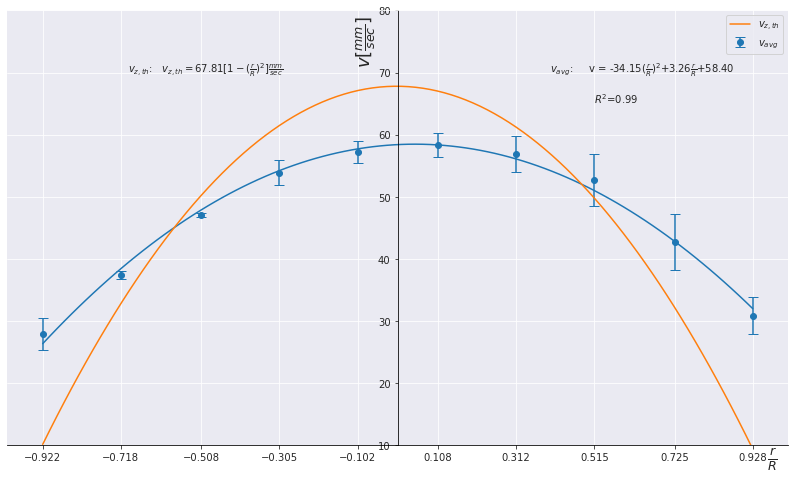

In [176]:
plt.close('all')
fig, ax = plt.subplots(figsize=(14, 8))
plt.errorbar(vel[r'$\frac{r}{R}$'], vel['$v_{avg}$'], yerr=vel['$\sigma $'], marker='o', label='$v_{avg}$', capsize=5, ls='')
xp = np.linspace(-0.922, 0.928, 100)
plt.plot(xp, mymodel(xp), c='C0')
plt.plot(xp, [v_max_th*(1 - (x**2)) for x in xp], label='$v_{z,th}$')
plt.text(0.4, 70, r'$v_{avg}$:     ' f'v = {mymodel[2]:.2f}' r'($ \frac {r}{R})^2 $' '+' f'{mymodel[1]:.2f}' r'$\frac {r}{R}$' '+' f'{mymodel[0]:.2f} ')
plt.text(0.515, 65, '$R^2$' '=' f'{r2:.2f}')
plt.text(-0.7, 70, r'$v_{z,th}$:   ' r'$ v_{z,th} = 67.81[1 - (\frac {r}{R})^2] \frac{mm}{sec} $')
ax.spines['left'].set_position('center')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_label_coords(0.98, 0.)
ax.yaxis.set_label_coords(0.475, 0.93)
plt.xticks([i for i in data.iloc[[x*6 for x in range(10)]]['r/R']])
plt.ylim(10, 80)
plt.xlabel(r'$ \frac {r}{R} $', fontsize=18)
plt.ylabel(r'$ v [\frac{mm}{sec}]$', fontsize=18)
plt.legend(loc="best")
plt.savefig('g3.png')
plt.show()

In [181]:
(58.37-67.81)*100/67.81

-13.921250553015785